In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

### Project overview
#### in this project, i performed a complete Exploratory Data Analysis(EDA) on the IPL Dataset which include batting and bowling statistics of all teams and player the goal was to identify patterns, performance insights and trends using python.

In [48]:
batter_df = pd.read_csv('IPL2025Batters.csv')  # batter dataset
batter_df.head(2)

,Player Name,Team,Runs,Matches,Inn,No,HS,AVG,BF,SR,100s,50s,4s,6s
0,Sai Sudharsan,GT,759,15,15,1,108*,54.21,486,156.17,1,6,88,21
1,Surya Kumar Yadav,MI,717,16,16,5,73*,65.18,427,167.91,0,5,69,38


In [47]:
bowler_df = pd.read_csv('IPL2025Bowlers.csv')  # bowler dataset
bowler_df.head(2)

,Player Name,Team,WKT,MAT,INN,OVR,RUNS,BBI,AVG,ECO,SR,4W,5W
0,Prasidh Krishna,GT,25,15,15,59.0,488,41/4,19.52,8.27,14.16,1,0
1,Noor Ahmad,CSK,24,14,14,50.0,408,18/4,17.00,8.16,12.50,2,0


### Data Exploration

In [5]:
print(f"Data Row are {batter_df.shape[0]} and columns are {bowler_df.shape[1]} ")

Data Row are 156 and columns are 13 


In [6]:
batter_df.info()
bowler_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 156 entries, 0 to 155
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Player Name  156 non-null    object 
 1   Team         156 non-null    object 
 2   Runs         156 non-null    int64  
 3   Matches      156 non-null    int64  
 4   Inn          156 non-null    int64  
 5   No           156 non-null    int64  
 6   HS           156 non-null    object 
 7   AVG          156 non-null    object 
 8   BF           156 non-null    int64  
 9   SR           156 non-null    float64
 10  100s         156 non-null    int64  
 11  50s          156 non-null    int64  
 12  4s           156 non-null    int64  
 13  6s           156 non-null    int64  
dtypes: float64(1), int64(9), object(4)
memory usage: 17.2+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 108 entries, 0 to 107
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------  

In [7]:
batter_df.duplicated().sum()

np.int64(0)

### Most Runs by Players

In [8]:
top_score_bt = batter_df.groupby('Player Name')['Runs'].sum().reset_index().sort_values(by='Runs',ascending=False).head(10)
top_score_bt

,Player Name,Runs
114,Sai Sudharsan,759
134,Surya Kumar Yadav,717
148,Virat Kohli,657
130,Shubman Gill,650
72,Mitchell Marsh,627
128,Shreyas Iyer,604
155,Yashasvi Jaiswal,559
89,Prabhsimran Singh,549
50,K L Rahul,539
48,Jos Buttler,538


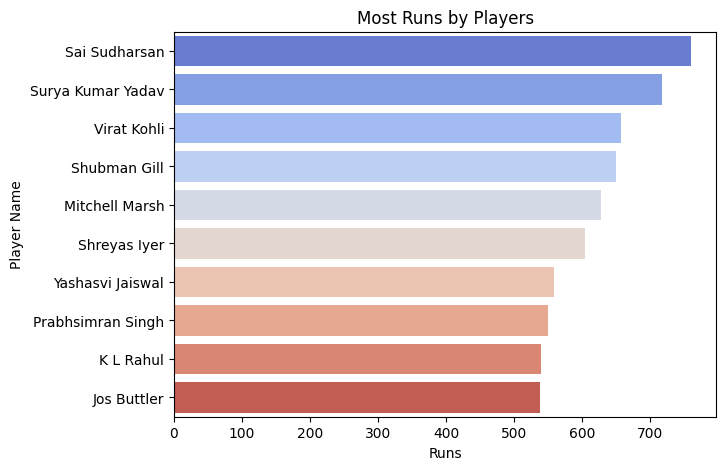

In [10]:
plt.figure(figsize=(7,5))
sns.barplot(y='Player Name', x='Runs', data=top_score_bt, palette='coolwarm')
plt.title("Most Runs by Players", fontsize=12)
plt.show()

### Most sixes by Teams

In [11]:
top_six = batter_df.groupby('Team')['6s'].sum().sort_values(ascending=False)

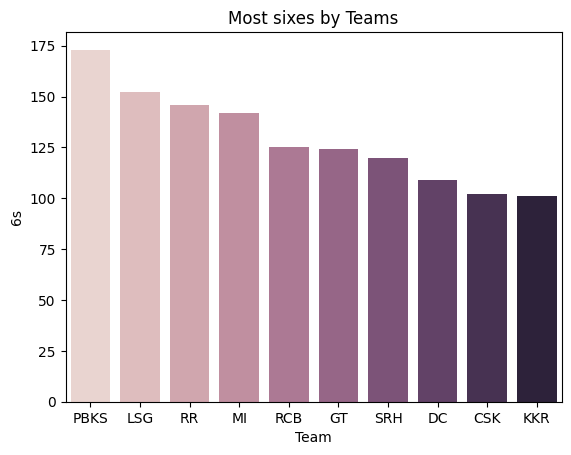

In [12]:
sns.barplot(top_six , palette='ch:')
plt.title('Most sixes by Teams')
plt.show()

### Highest Wicket-Takers

In [14]:
highest_wkt = bowler_df.groupby('Player Name')['WKT'].sum().reset_index().sort_values(by='WKT',ascending=False).head(10)
highest_wkt

,Player Name,WKT
69,Prasidh Krishna,25
66,Noor Ahmad,24
32,Josh Hazlewood,22
90,Trent Boult,22
9,Arshdeep Singh,21
80,Sai Kishore,19
29,Jasprit Bumrah,18
93,Vaibhav Arora,17
37,Krunal Pandya,17
15,Bhuvneshwar Kumar,17


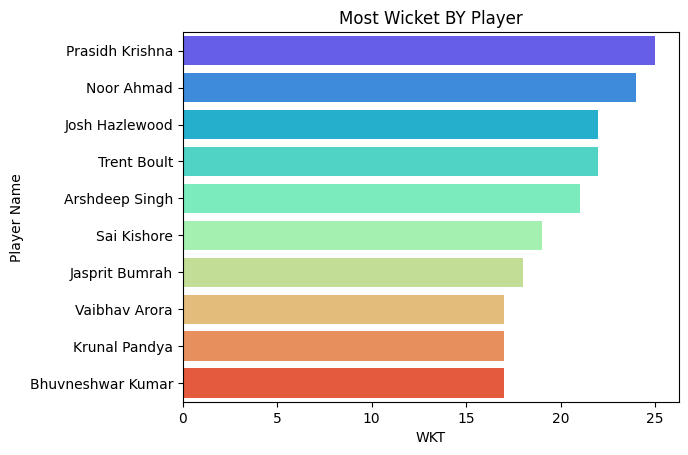

In [15]:
sns.barplot(y= 'Player Name', x='WKT', data=highest_wkt, palette='rainbow')
plt.title('Most Wicket BY Player')
plt.show()

In [49]:
bowler_df.head(1)

,Player Name,Team,WKT,MAT,INN,OVR,RUNS,BBI,AVG,ECO,SR,4W,5W
0,Prasidh Krishna,GT,25,15,15,59.0,488,41/4,19.52,8.27,14.16,1,0


### Bowling Economy Rate (Team wise)


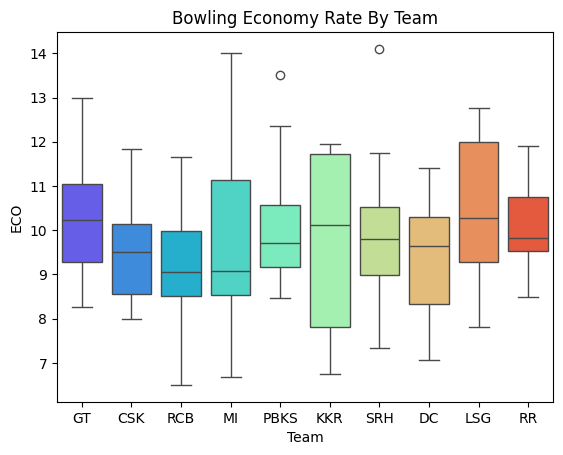

In [52]:
sns.boxplot(x='Team', y='ECO', data=bowler_df,palette='rainbow')
plt.title("Bowling Economy Rate By Team")
plt.show()

In [61]:
bowler_df.head(2)

,Player Name,Team,WKT,MAT,INN,OVR,RUNS,BBI,AVG,ECO,SR,4W,5W
0,Prasidh Krishna,GT,25,15,15,59.0,488,41/4,19.52,8.27,14.16,1,0
1,Noor Ahmad,CSK,24,14,14,50.0,408,18/4,17.00,8.16,12.50,2,0


### Bowler average vs Economy Rate

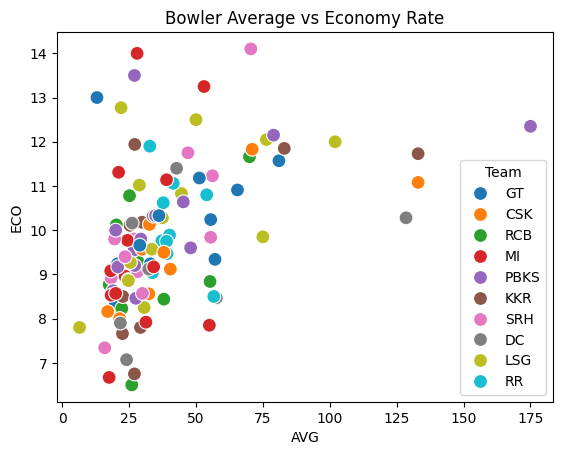

In [46]:
sns.scatterplot(x= 'AVG', y='ECO', data=bowler_df, hue='Team',s=100 )
plt.title('Bowler Average vs Economy Rate')
plt.show()